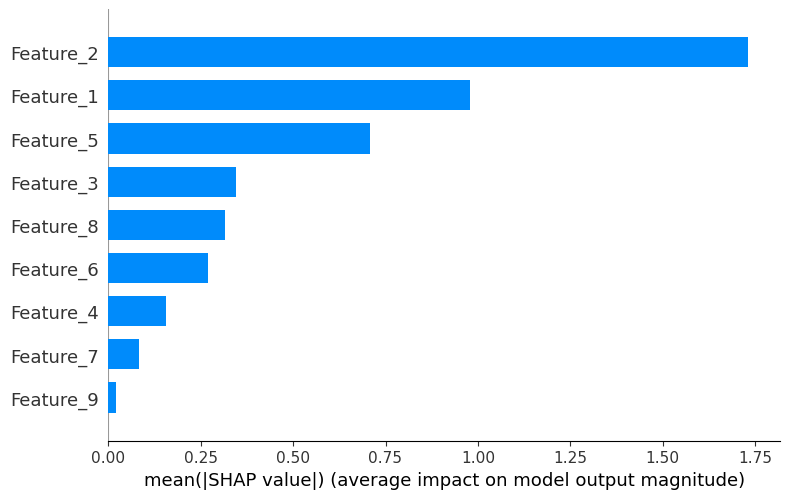

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# 生成模拟数据
np.random.seed(0)
n_samples = 1000
n_features = 9
X = np.random.randn(n_samples, n_features)
y = X[:, 0] * 1.5 + X[:, 1] * -2.3 + X[:, 2] * 0.8 + X[:, 3] * 0.6 + \
    X[:, 4] * -1.1 + X[:, 5] * 0.7 + X[:, 6] * 0.3 + X[:, 7] * -0.9 + \
    np.random.randn(n_samples) * 0.5  # 目标变量，依赖于前8个特征和一些噪声

# 将数据转换为DataFrame，为每个特征指定名称
column_names = [f'Feature_{i+1}' for i in range(n_features)]
X_df = pd.DataFrame(X, columns=column_names)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 创建SHAP解释器对象
explainer = shap.Explainer(model, X_train)

# 计算测试数据集的SHAP值
shap_values = explainer(X_test)

# 绘制特征贡献的柱状图
shap.summary_plot(shap_values.values, X_test, plot_type='bar')